<a href="https://colab.research.google.com/github/donatellaepifani/education-income-analysis/blob/main/anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dati**

In [ ]:
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Dati femmine
RLOSSF = np.array([12.61, 10.48, 10.24, 11.34, 10.88, 10.29, 12.00, 15.02, 10.52, 9.99, 9.46, 9.62, 10.29, 9.90, 8.15])
RLODF = np.array([14.73, 11.82, 11.16, 11.77, 14.38, 10.39, 13.53, 21.26, 11.32, 11.57, 10.38, 10.37, 10.52, 10.44, 8.46])
RLOLF = np.array([16.17, 12.61, 13.03, 13.76, 15.25, 10.75, 15.33, 21.25, 12.22, 13.58, 11.86, 12.36, 11.50, 11.08, 10.53])

# Dati maschi
RLOSSM = np.array([14.30, 11.56, 10.93, 11.27, 12.09, 10.38, 15.39, 22.57, 11.19, 10.98, 10.15, 10.33, 10.39, 10.24, 9.37])
RLODM = np.array([14.94, 11.68, 11.85, 12.03, 13.28, 10.68, 16.53, 26.38, 11.95, 12.91, 10.66, 10.84, 10.83, 10.82, 10.16])
RLOLM = np.array([17.91, 13.79, 16.10, 16.03, 15.34, 10.97, 17.87, 26.22, 16.17, 17.54, 12.17, 14.15, 13.23, 11.53, 11.66])

**Analisi ANOVA (RLOM) + Test tukey**

In [ ]:
data = {
    'valore': np.concatenate([RLOSSM, RLODM, RLOLM]),
    'gruppo': ['RLOSSM']*len(RLOSSM) + ['RLODM']*len(RLODM) + ['RLOLM']*len(RLOLM)
}

df = pd.DataFrame(data)

# Modello ANOVA
model = ols('valore ~ gruppo', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Risultati ANOVA
print("Risultati ANOVA:")
print(anova_table)

# Se ANOVA è significativa, eseguiamo il test di Tukey
if anova_table['PR(>F)'][0] < 0.05:
    tukey = pairwise_tukeyhsd(df['valore'], df['gruppo'], alpha=0.05)
    print("\nRisultati del test di Tukey:")
    print(tukey)
else:
    print("\nANOVA non significativa, non eseguiamo il test di Tukey.")

Risultati ANOVA:
              sum_sq    df         F    PR(>F)
gruppo     86.586471   2.0  3.080174  0.056462
Residual  590.328893  42.0       NaN       NaN

ANOVA non significativa, non eseguiamo il test di Tukey.


<ipython-input-9-88f6aefbb570>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


**Test ANOVA (RLOF) + Test tukey**

In [ ]:
data = {
    'valore': np.concatenate([RLOSSF, RLODF, RLOLF]),
    'gruppo': ['RLOSSF']*len(RLOSSF) + ['RLODF']*len(RLODF) + ['RLOLF']*len(RLOLF)
}

df = pd.DataFrame(data)

# Modello ANOVA
model = ols('valore ~ gruppo', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Risultati ANOVA
print("Risultati ANOVA:")
print(anova_table)

# Se ANOVA è significativa, eseguiamo il test di Tukey
if anova_table['PR(>F)'][0] < 0.05:
    tukey = pairwise_tukeyhsd(df['valore'], df['gruppo'], alpha=0.05)
    print("\nRisultati del test di Tukey:")
    print(tukey)
else:
    print("\nANOVA non significativa, non eseguiamo il test di Tukey.")


Risultati ANOVA:
              sum_sq    df         F    PR(>F)
gruppo     54.698413   2.0  4.266123  0.020573
Residual  269.253067  42.0       NaN       NaN


<ipython-input-10-85bde93dd5c9>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:



Risultati del test di Tukey:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 RLODF  RLOLF   1.2787 0.3588 -0.9675  3.5248  False
 RLODF RLOSSF  -1.4207 0.2845 -3.6668  0.8255  False
 RLOLF RLOSSF  -2.6993 0.0152 -4.9455 -0.4532   True
----------------------------------------------------


**Dataframe (RLOF)**

In [ ]:
data_femmine = pd.DataFrame({
    'RLOSSF': [12.61, 10.48, 10.24, 11.34, 10.88, 10.29, 12.00, 15.02, 10.52, 9.99, 9.46, 9.62, 10.29, 9.90, 8.15],
    'RLODF': [14.73, 11.82, 11.16, 11.77, 14.38, 10.39, 13.53, 21.26, 11.32, 11.57, 10.38, 10.37, 10.52, 10.44, 8.46],
    'RLOLF': [16.17, 12.61, 13.03, 13.76, 15.25, 10.75, 15.33, 21.25, 12.22, 13.58, 11.86, 12.36, 11.50, 11.08, 10.53]
})

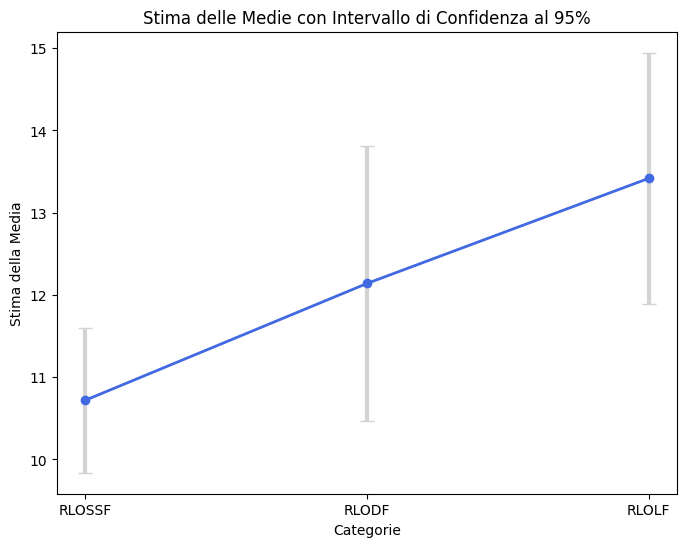

In [ ]:
means = data_femmine.mean()
sems = data_femmine.sem()  # Standard Error of the Mean (SEM)
conf_ints = [stats.t.interval(0.95, len(data_femmine) - 1, loc=mean, scale=sem)
             for mean, sem in zip(means, sems)]

# Estrazione dei limiti dell'intervallo di confidenza
lower_ci = [ci[0] for ci in conf_ints]
upper_ci = [ci[1] for ci in conf_ints]

# Categorie da plottare
categories = data_femmine.columns

# Creare il grafico
fig, ax = plt.subplots(figsize=(8, 6))

# Plot delle medie con intervalli di confidenza
ax.errorbar(categories, means, yerr=[np.array(means) - np.array(lower_ci), np.array(upper_ci) - np.array(means)],
            fmt='o', color='royalblue', ecolor='lightgray', elinewidth=3, capsize=5)

# Unire i punti delle medie con una linea
ax.plot(categories, means, color='royalblue', linestyle='-', linewidth=2)

# Etichettare gli assi
ax.set_xlabel('Categorie')
ax.set_ylabel('Stima della Media')
ax.set_title('Stima delle Medie con Intervallo di Confidenza al 95%')

# Mostrare il grafico
plt.show()

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 RLODF  RLOLF   1.2787 0.3588 -0.9675  3.5248  False
 RLODF RLOSSF  -1.4207 0.2845 -3.6668  0.8255  False
 RLOLF RLOSSF  -2.6993 0.0152 -4.9455 -0.4532   True
----------------------------------------------------


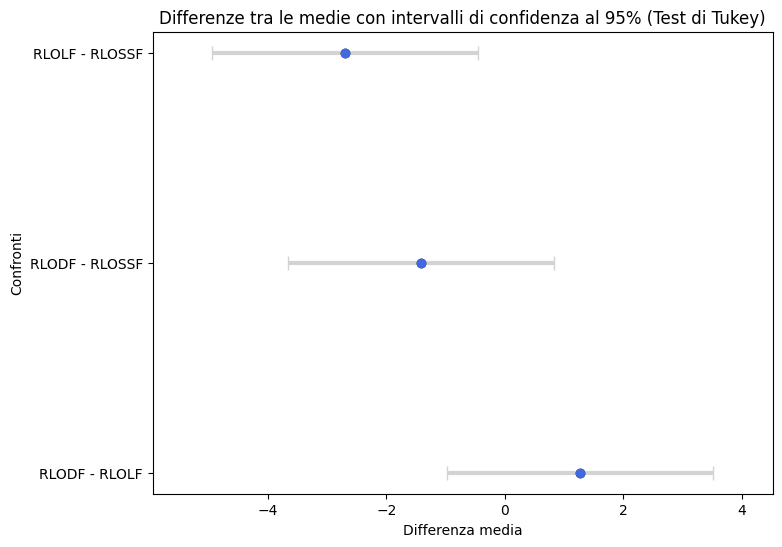

In [ ]:
data_tukey = pd.DataFrame({
    'Valore': data_femmine.values.flatten(),
    'Gruppo': np.tile(data_femmine.columns, len(data_femmine))
})

# Eseguire il test di Tukey
tukey_result = pairwise_tukeyhsd(endog=data_tukey['Valore'], groups=data_tukey['Gruppo'], alpha=0.05)

# Mostrare i risultati del test di Tukey
print(tukey_result.summary())

# Creare il grafico delle differenze tra le medie con intervalli di confidenza al 95%
fig, ax = plt.subplots(figsize=(8, 6))

# Estrazione dei risultati dal test di Tukey
diff_means = tukey_result.meandiffs  # Le differenze tra le medie
confronti = ['RLODF - RLOLF', 'RLODF - RLOSSF', 'RLOLF - RLOSSF']  # I gruppi da confrontare
lower_ci = tukey_result.confint[:, 0]  # Limite inferiore dell'intervallo di confidenza
upper_ci = tukey_result.confint[:, 1]  # Limite superiore dell'intervallo di confidenza

# Aggiungere le barre di errore con l'intervallo di confidenza
ax.errorbar(diff_means, confronti, xerr=[diff_means - lower_ci, upper_ci - diff_means], fmt='o', color='black',
            ecolor='lightgray', elinewidth=3, capsize=5)

# Aggiungere le differenze medie come punti
ax.scatter(diff_means, confronti, color='royalblue', zorder=5)

# Personalizzare l'asse x e l'asse y
ax.set_xlabel('Differenza media')
ax.set_ylabel('Confronti')

# Impostare i limiti dell'asse x per includere i valori negativi
ax.set_xlim(left=min(lower_ci) - 1, right=max(upper_ci) + 1)

# Titolo del grafico
plt.title("Differenze tra le medie con intervalli di confidenza al 95% (Test di Tukey)")
plt.show()